# Install packages and import libraries

In [1]:
# Install necessary packages
%pip install -r requirements.txt

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import scipy
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d
from scipy.stats import skew
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
import keras_tuner as kt





  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
Note: you may need to restart the kernel to use updat

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\tomto\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\tomto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'tensorflow.python'

# Data Analysis

Variance profiles of the accelerometer axes

In [ ]:
# Load the CSV file
df = pd.read_csv("../Dataset/CORRECT_speed.csv")

# Ensure the Timestamp is in integer format (if not, we convert it)
df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')

# Convert timestamps to datetime (assuming the timestamp is in milliseconds)
df['Datetime'] = pd.to_datetime(df['Timestamp'], unit='ms')

# Filter only Accelerometer data
accel_df = df[df['Sensor'] == 'Accelerometer']

# Limit to the first 2000 samples
accel_df = accel_df.head(2000)

# Define the time range (start and end times)
start_time = pd.to_datetime("1970-02-04 01:48:07")  # Adjusted to the correct date
end_time = pd.to_datetime("1970-02-04 01:48:13")    # Adjusted to the correct date

# Filter the data between these times
filtered_df = accel_df[(accel_df['Datetime'] >= start_time) & (accel_df['Datetime'] <= end_time)]

# Check the filtered data
print(filtered_df)

# Plot X, Y, Z values with timestamps as datetime
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Datetime'], filtered_df['X'], label='X-axis', color='red')
plt.plot(filtered_df['Datetime'], filtered_df['Y'], label='Y-axis', color='green')
plt.plot(filtered_df['Datetime'], filtered_df['Z'], label='Z-axis', color='blue')
plt.xlabel("Timestamp")
plt.ylabel("Acceleration")
plt.title("Variance Profile of the Accelerometer Axes")

# Add legend to label each axis
plt.legend(title='Axes')

plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

NameError: name 'pd' is not defined

SMOOTHED Variance profiles of the accelerometer axes

In [ ]:
# Load the CSV file
df = pd.read_csv("../Dataset/CORRECT_speed.csv")

# Convert Timestamp to numeric and to datetime
df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
df['Datetime'] = pd.to_datetime(df['Timestamp'], unit='ms')

# Filter only Accelerometer data
accel_df = df[df['Sensor'] == 'Accelerometer']

# Limit to the first 2000 samples
accel_df = accel_df.head(2000)

# Filter by specific time range
start_time = pd.to_datetime("1970-02-04 01:48:07")
end_time = pd.to_datetime("1970-02-04 01:48:13")
filtered_df = accel_df[(accel_df['Datetime'] >= start_time) & (accel_df['Datetime'] <= end_time)]

# Apply exponential moving average filter with alpha = 0.2
alpha = 0.2
filtered_df['X_filtered'] = filtered_df['X'].ewm(alpha=alpha, adjust=False).mean()
filtered_df['Y_filtered'] = filtered_df['Y'].ewm(alpha=alpha, adjust=False).mean()
filtered_df['Z_filtered'] = filtered_df['Z'].ewm(alpha=alpha, adjust=False).mean()

# Plot filtered data
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Datetime'], filtered_df['X_filtered'], label='X-axis (filtered)', color='red')
plt.plot(filtered_df['Datetime'], filtered_df['Y_filtered'], label='Y-axis (filtered)', color='green')
plt.plot(filtered_df['Datetime'], filtered_df['Z_filtered'], label='Z-axis (filtered)', color='blue')
plt.xlabel("Timestamp")
plt.ylabel("Acceleration (Filtered)")
plt.title("Filtered Variance Profile of the Accelerometer Axes")
plt.legend(title="Axes")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Variance profiles of the gyroscope axes

In [ ]:
# Load the CSV file
df = pd.read_csv("../Dataset/CORRECT_speed.csv")

# Ensure the Timestamp is in integer format (if not, we convert it)
df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')

# Convert timestamps to datetime (assuming the timestamp is in milliseconds)
df['Datetime'] = pd.to_datetime(df['Timestamp'], unit='ms')

# Filter only Gyroscope data
gyro_df = df[df['Sensor'] == 'Gyroscope']

# Limit to the first 2000 samples
gyro_df = gyro_df.head(2000)

# Define the time range (start and end times)
start_time = pd.to_datetime("1970-02-04 01:48:07")
end_time = pd.to_datetime("1970-02-04 01:48:13")

# Filter the data between these times
filtered_df = gyro_df[(gyro_df['Datetime'] >= start_time) & (gyro_df['Datetime'] <= end_time)]

# Plot X, Y, Z values with timestamps as datetime
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Datetime'], filtered_df['X'], label='X-axis', color='red')
plt.plot(filtered_df['Datetime'], filtered_df['Y'], label='Y-axis', color='green')
plt.plot(filtered_df['Datetime'], filtered_df['Z'], label='Z-axis', color='blue')
plt.xlabel("Timestamp")
plt.ylabel("Angular Velocity")
plt.title("Variance Profile of the Gyroscope Axes")

# Add legend to label each axis
plt.legend(title='Axes')

plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Comparison of the accelerometer axes variation profiles between all four form classes

In [ ]:
# File-specific timestamp boundaries
file_info = {
    "../Dataset/CORRECT_fatigue.csv": {
        "title": "Correct Form",
        "start": "1970-02-04 02:31:01",
        "end": "1970-02-04 02:31:04"
    },
    "../Dataset/PARTIAL_fatigue.csv": {
        "title": "Partial Range of Motion",
        "start": "1970-02-04 05:32:05",
        "end": "1970-02-04 05:32:08.5"
    },
    "../Dataset/MOMENTUM_fatigue.csv": {
        "title": "Excessive Use of Momentum",
        "start": "1970-03-21 08:49:36",
        "end": "1970-03-21 08:49:37.5"
    },
    "../Dataset/ELBOW_fatigue.csv": {
        "title": "Moving Elbow and Shoulder",
        "start": "1970-02-04 10:31:51",
        "end": "1970-02-04 10:31:54"
    }
}

color_map = {
    "../Dataset/CORRECT_fatigue.csv": "mediumblue",
    "../Dataset/PARTIAL_fatigue.csv": "forestgreen",
    "../Dataset/MOMENTUM_fatigue.csv": "crimson",
    "../Dataset/ELBOW_fatigue.csv": "darkorange"
}

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.flatten()

# Process and plot each file
for idx, (filename, info) in enumerate(file_info.items()):
    # Load and convert
    df = pd.read_csv(filename)
    df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
    df['Datetime'] = pd.to_datetime(df['Timestamp'], unit='ms')

    # Filter for accelerometer
    accel_df = df[df['Sensor'] == 'Accelerometer']

    # Time filtering
    start_time = pd.to_datetime(info['start'])
    end_time = pd.to_datetime(info['end'])
    segment_df = accel_df[(accel_df['Datetime'] >= start_time) & (accel_df['Datetime'] <= end_time)]

    # Normalize time
    segment_df = segment_df.copy()
    segment_df['Time (s)'] = (segment_df['Datetime'] - segment_df['Datetime'].iloc[0]).dt.total_seconds()

    # Plot in subplot
    axs[idx].plot(segment_df['Time (s)'], segment_df['X'], color=color_map[filename])
    axs[idx].set_title(info['title'])
    axs[idx].set_xlabel("Time (s)")
    axs[idx].set_ylabel("Acceleration (X)")
    axs[idx].grid(True)

# Tight layout and show
plt.tight_layout()
plt.suptitle("Accelerometer X-Axis for Variations in Bicep Curl Form", fontsize=16, y=1.02)
plt.subplots_adjust(top=0.92)  # space for suptitle
plt.show()


# Segment a sensor stream file into repetitions

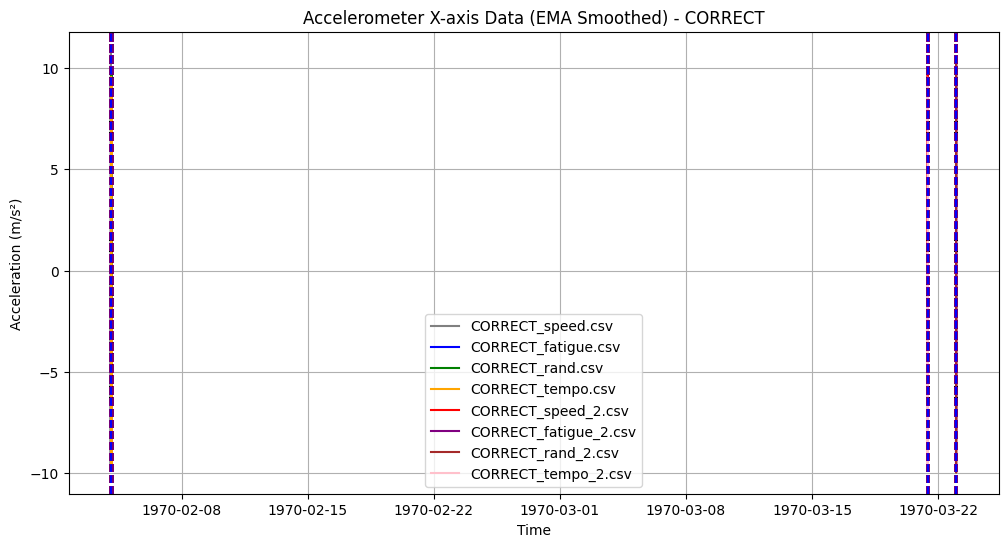

Total reps for CORRECT: 982


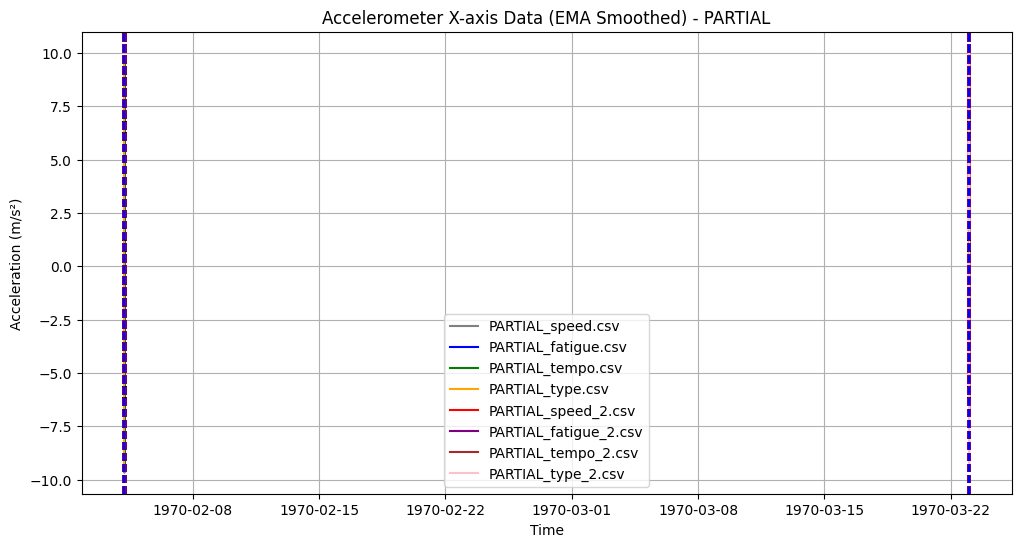

Total reps for PARTIAL: 948


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


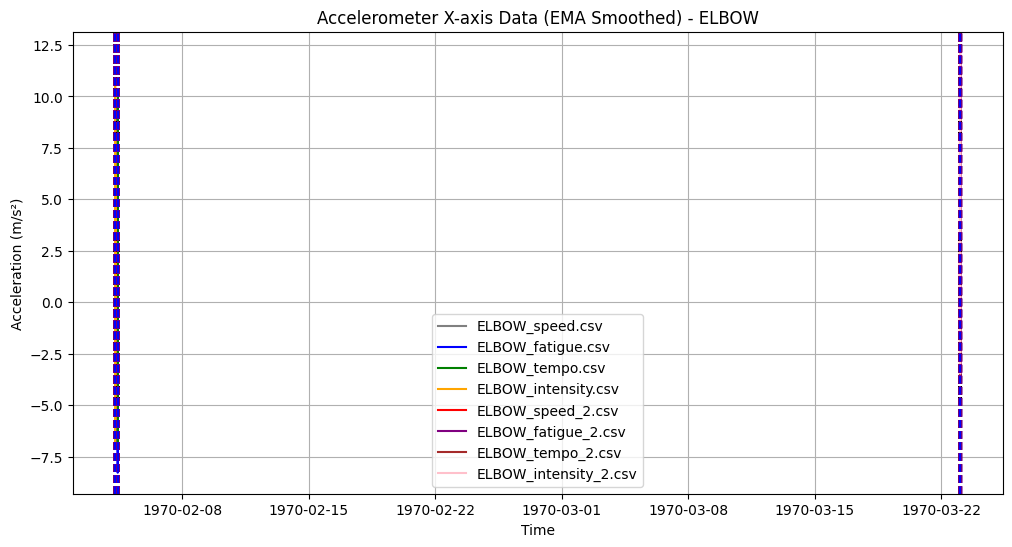

Total reps for ELBOW: 1047


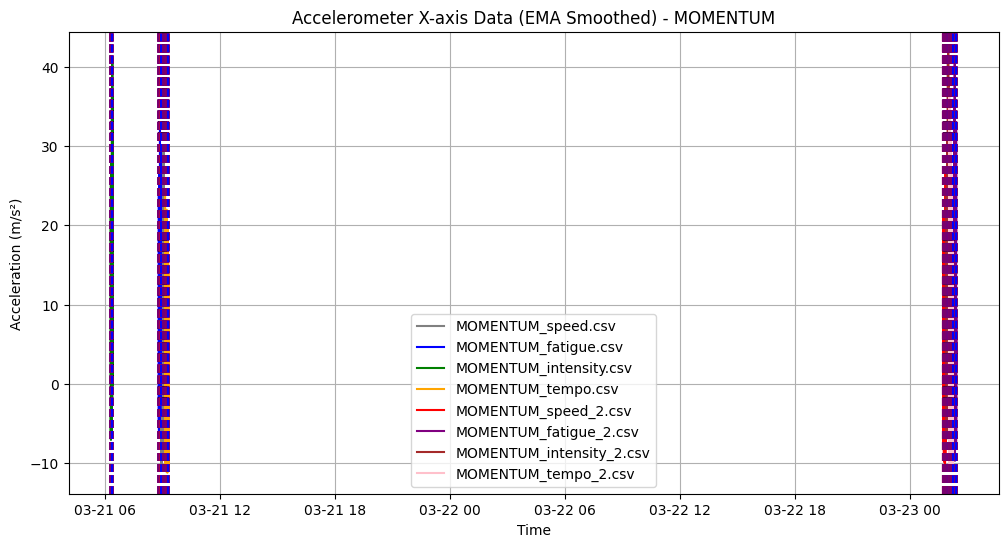

Total reps for MOMENTUM: 997


In [ ]:


def process_files(file_paths, category_name, use_smoothing=True):
    """
    Process a list of files to detect repetitions with optional EMA smoothing.

    Parameters:
    - file_paths: List of file paths to process.
    - category_name: Name of the category (for labeling plots).
    - use_smoothing: If True, applies EMA smoothing (alpha=0.2). Default: True.

    Returns:
    - List of dictionaries containing rep data for each file.
    """
    reps = []

    for file_path in file_paths:
        data = pd.read_csv(file_path)

        # Split accelerometer and gyroscope data
        accel_data = data[data['Sensor'] == "Accelerometer"].reset_index(drop=True)
        gyro_data = data[data['Sensor'] == "Gyroscope"].reset_index(drop=True)

        # Convert timestamp to datetime
        accel_data['Timestamp'] = pd.to_datetime(accel_data['Timestamp'], unit='ms')
        gyro_data['Timestamp'] = pd.to_datetime(gyro_data['Timestamp'], unit='ms')

        # Extract X-axis accelerometer data
        accel_data_x = accel_data['X']

        # Apply EMA smoothing if enabled
        if use_smoothing:
            alpha = 0.2  # Smoothing factor
            smoothed_x = accel_data_x.ewm(alpha=alpha).mean()
            signal_for_peaks = smoothed_x
            plot_signal = smoothed_x
            smoothing_label = " (EMA Smoothed)"
        else:
            signal_for_peaks = accel_data_x
            plot_signal = accel_data_x
            smoothing_label = " (RAW)"

        # Find peaks and troughs
        peaks, _ = find_peaks(signal_for_peaks, height=0.1)
        troughs, _ = find_peaks(-signal_for_peaks, height=0.05)

        # Define a minimum distance between troughs for valid reps
        min_distance = 100

        previous_end_idx = None

        for i in range(len(troughs) - 1):
            if previous_end_idx is None:
                start_idx = troughs[i]
            else:
                start_idx = previous_end_idx

            end_idx = troughs[i + 1]

            peaks_in_range = [peak for peak in peaks if start_idx < peak < end_idx]

            if len(peaks_in_range) > 0 and (end_idx - start_idx) > min_distance:
                rep_accel_data = accel_data.iloc[start_idx:end_idx]
                start_time = rep_accel_data['Timestamp'].iloc[0]
                end_time = rep_accel_data['Timestamp'].iloc[-1]

                rep_gyro_data = gyro_data[(gyro_data['Timestamp'] >= start_time) &
                                          (gyro_data['Timestamp'] <= end_time)]

                reps.append({
                    "file": file_path,
                    "start_idx": start_idx,
                    "end_idx": end_idx,
                    "accel_data": rep_accel_data,
                    "gyro_data": rep_gyro_data
                })

                previous_end_idx = end_idx

    # Visualization
    plt.figure(figsize=(12, 6))
    colors = ['gray', 'blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'olive', 'cyan']

    for i, file_path in enumerate(file_paths):
        file_reps = [rep for rep in reps if rep["file"] == file_path]

        if file_reps:
            accel_data = pd.read_csv(file_path)
            accel_data = accel_data[accel_data['Sensor'] == "Accelerometer"].reset_index(drop=True)
            accel_data['Timestamp'] = pd.to_datetime(accel_data['Timestamp'], unit='ms')

            # Plot smoothed or raw data based on selection
            if use_smoothing:
                plt.plot(accel_data['Timestamp'], accel_data['X'].ewm(alpha=0.2).mean(),
                         label=f'{file_path}', color=colors[i])
            else:
                plt.plot(accel_data['Timestamp'], accel_data['X'],
                         label=f'{file_path}', color=colors[i])

            for rep in file_reps:
                start_idx = rep["start_idx"]
                end_idx = rep["end_idx"]
                plt.axvline(accel_data['Timestamp'][start_idx], color='red', linestyle='--')
                plt.axvline(accel_data['Timestamp'][end_idx], color='blue', linestyle='--')

    plt.xlabel('Time')
    plt.ylabel('Acceleration (m/s²)')
    plt.title(f'Accelerometer X-axis Data{smoothing_label} - {category_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Total reps for {category_name}: {len(reps)}")
    return reps



# Apply segmentation to all training data files

# Define file paths for each category
correct_files = ["../Dataset/CORRECT_speed.csv", "../Dataset/CORRECT_fatigue.csv", "../Dataset/CORRECT_rand.csv", "../Dataset/CORRECT_tempo.csv",
                 "../Dataset/CORRECT_speed_2.csv", "../Dataset/CORRECT_fatigue_2.csv", "../Dataset/CORRECT_rand_2.csv", "../Dataset/CORRECT_tempo_2.csv"]

partial_files = ["../Dataset/PARTIAL_speed.csv", "../Dataset/PARTIAL_fatigue.csv", "../Dataset/PARTIAL_tempo.csv", "../Dataset/PARTIAL_type.csv",
                 "../Dataset/PARTIAL_speed_2.csv", "../Dataset/PARTIAL_fatigue_2.csv", "../Dataset/PARTIAL_tempo_2.csv", "../Dataset/PARTIAL_type_2.csv"]

elbow_files = ["../Dataset/ELBOW_speed.csv", "../Dataset/ELBOW_fatigue.csv", "../Dataset/ELBOW_tempo.csv", "../Dataset/ELBOW_intensity.csv",
               "../Dataset/ELBOW_speed_2.csv", "../Dataset/ELBOW_fatigue_2.csv", "../Dataset/ELBOW_tempo_2.csv", "../Dataset/ELBOW_intensity_2.csv"]

momentum_files = ["../Dataset/MOMENTUM_speed.csv", "../Dataset/MOMENTUM_fatigue.csv", "../Dataset/MOMENTUM_intensity.csv", "../Dataset/MOMENTUM_tempo.csv",
                  "../Dataset/MOMENTUM_speed_2.csv", "../Dataset/MOMENTUM_fatigue_2.csv", "../Dataset/MOMENTUM_intensity_2.csv", "../Dataset/MOMENTUM_tempo_2.csv"]



# Process files WITH smoothing
correct_reps = process_files(correct_files, "CORRECT", use_smoothing=True)
partial_reps = process_files(partial_files, "PARTIAL", use_smoothing=True)
elbow_reps = process_files(elbow_files, "ELBOW", use_smoothing=True)
momentum_reps = process_files(momentum_files, "MOMENTUM", use_smoothing=True)


# Preprocess the segmented data

Check for NaN values, and remove unnecessary columns

In [ ]:

# Function to check for NaN values
def check_nan_values_all_reps(reps, label):
    accel_combined = pd.concat([rep['accel_data'] for rep in reps], ignore_index=True)
    gyro_combined = pd.concat([rep['gyro_data'] for rep in reps], ignore_index=True)

    accel_nans = accel_combined.isnull().sum()
    gyro_nans = gyro_combined.isnull().sum()

    if accel_nans.sum() > 0:
        print(f"\nTotal NaN Counts in {label} Accelerometer Data Across All Reps:")
        print(accel_nans)
    else:
        print(f"\nNo NaN values in {label} Accelerometer Data Across All Reps")

    if gyro_nans.sum() > 0:
        print(f"\nTotal NaN Counts in {label} Gyroscope Data Across All Reps:")
        print(gyro_nans)
    else:
        print(f"\nNo NaN values in {label} Gyroscope Data Across All Reps")

# CORRECT FORM #

# Drop only the 'Sensor' and 'Timestamp' columns for all reps
columns_to_drop = [0, 1]  # Dropping 'Sensor' (0) and 'Timestamp' (1)

# Loop through all reps and clean the data
for i, rep in enumerate(correct_reps):
    # Drop columns by index for accelerometer and gyroscope data
    accel_data_cleaned = rep['accel_data'].drop(rep['accel_data'].columns[columns_to_drop], axis=1)
    gyro_data_cleaned = rep['gyro_data'].drop(rep['gyro_data'].columns[columns_to_drop], axis=1)

    # Update the rep with cleaned data
    rep['accel_data'] = accel_data_cleaned
    rep['gyro_data'] = gyro_data_cleaned




check_nan_values_all_reps(correct_reps, "Correct Form")

# PARTIAL RANGE OF MOTION #
columns_to_drop = [0, 1]  # Dropping 'Sensor' (0) and 'Timestamp' (1)

# Loop through all reps and clean the data
for i, rep in enumerate(partial_reps):
    # Drop columns by index for accelerometer and gyroscope data
    accel_data_cleaned = rep['accel_data'].drop(rep['accel_data'].columns[columns_to_drop], axis=1)
    gyro_data_cleaned = rep['gyro_data'].drop(rep['gyro_data'].columns[columns_to_drop], axis=1)

    # Update the rep with cleaned data
    rep['accel_data'] = accel_data_cleaned
    rep['gyro_data'] = gyro_data_cleaned




check_nan_values_all_reps(partial_reps, "Partial ROM Form")

# EXCESSIVE USE OF MOMENTUM #
columns_to_drop = [0, 1]  # Dropping 'Sensor' (0) and 'Timestamp' (1)

# Loop through all reps and clean the data
for i, rep in enumerate(momentum_reps):
    # Drop columns by index for accelerometer and gyroscope data
    accel_data_cleaned = rep['accel_data'].drop(rep['accel_data'].columns[columns_to_drop], axis=1)
    gyro_data_cleaned = rep['gyro_data'].drop(rep['gyro_data'].columns[columns_to_drop], axis=1)

    # Update the rep with cleaned data
    rep['accel_data'] = accel_data_cleaned
    rep['gyro_data'] = gyro_data_cleaned




check_nan_values_all_reps(momentum_reps, "Momentum Use Form")

# MOVING ELBOWS AND SHOULDERS #
columns_to_drop = [0, 1]  # Dropping 'Sensor' (0) and 'Timestamp' (1)

# Loop through all reps and clean the data
for i, rep in enumerate(elbow_reps):
    # Drop columns by index for accelerometer and gyroscope data
    accel_data_cleaned = rep['accel_data'].drop(rep['accel_data'].columns[columns_to_drop], axis=1)
    gyro_data_cleaned = rep['gyro_data'].drop(rep['gyro_data'].columns[columns_to_drop], axis=1)

    # Update the rep with cleaned data
    rep['accel_data'] = accel_data_cleaned
    rep['gyro_data'] = gyro_data_cleaned



check_nan_values_all_reps(elbow_reps, "Elbow Moving Form")




No NaN values in Correct Form Accelerometer Data Across All Reps

No NaN values in Correct Form Gyroscope Data Across All Reps

No NaN values in Partial ROM Form Accelerometer Data Across All Reps

No NaN values in Partial ROM Form Gyroscope Data Across All Reps

No NaN values in Momentum Use Form Accelerometer Data Across All Reps

No NaN values in Momentum Use Form Gyroscope Data Across All Reps

No NaN values in Elbow Moving Form Accelerometer Data Across All Reps

No NaN values in Elbow Moving Form Gyroscope Data Across All Reps


Apply feature extraction

In [ ]:


def extract_features(data, sensor_type):
    features = {}
    # Get the actual column names from the DataFrame
    columns = data.columns

    # Loop through available columns instead of assuming 'X', 'Y', 'Z'
    for axis in columns:
        features[f'{sensor_type}_{axis}_mean'] = data[axis].mean()
        features[f'{sensor_type}_{axis}_std'] = data[axis].std()
        features[f'{sensor_type}_{axis}_max'] = data[axis].max()
        features[f'{sensor_type}_{axis}_min'] = data[axis].min()
        features[f'{sensor_type}_{axis}_range'] = data[axis].max() - data[axis].min()
        features[f'{sensor_type}_{axis}_median'] = data[axis].median()
        features[f'{sensor_type}_{axis}_skew'] = skew(data[axis])
        features[f'{sensor_type}_{axis}_kurtosis'] = data[axis].kurtosis()
        features[f'{sensor_type}_{axis}_variance'] = data[axis].var()
        features[f'{sensor_type}_{axis}_iqr'] = data[axis].quantile(0.75) - data[axis].quantile(0.25)
    return features

# Extract features for accelerometer and gyroscope data separately for Rep 1
rep1_features_a = extract_features(correct_reps[0]['accel_data'], 'accel')
rep1_features_g = extract_features(correct_reps[0]['gyro_data'], 'gyro')

# Combine both sets of features into one dictionary
features_rep1 = {**rep1_features_a, **rep1_features_g}

test_frame = []
for rep in test_reps:
    accel_data = rep['accel_data']
    gyro_data = rep['gyro_data']

    # Extract features for accelerometer and gyroscope data
    accel_features = extract_features(accel_data, 'accel')
    gyro_features = extract_features(gyro_data, 'gyro')

    # Combine the features from both accelerometer and gyroscope
    features = {**accel_features, **gyro_features}

    # Append the features to the test_frame list
    test_frame.append(features)

test_frame_df = pd.DataFrame(test_frame)
print(test_frame_df)

# Print the extracted features
print(features_rep1)


    accel_X_mean  accel_X_std  accel_X_max  accel_X_min  accel_X_range  \
0       5.530536     3.778490    15.325285    -4.548983      19.874268   
1       8.784186     7.117865    26.120740    -6.813898      32.934638   
2       5.196297     5.321886    18.540697    -8.482656      27.023353   
3       5.412289     6.182402    17.812860   -15.717935      33.530795   
4       3.562096     5.679195    13.496115   -10.879252      24.375367   
5       4.048566     5.777499    13.555970   -11.310209      24.866179   
6       3.106218     5.880481    15.717935   -10.692505      26.410440   
7       2.534894     5.846464     9.902418   -14.887146      24.789564   
8       2.229912     5.946054    11.374852   -12.363658      23.738510   
9       4.066637     5.917922    15.016433   -10.369288      25.385720   
10      3.905803     6.168478    14.853627   -14.283808      29.137435   
11      3.075905     5.586719    10.390836   -10.752359      21.143195   
12      2.740578     5.989418    12.08

<ipython-input-6-015c2e253e10>:18: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  features[f'{sensor_type}_{axis}_skew'] = skew(data[axis])
<ipython-input-6-015c2e253e10>:18: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  features[f'{sensor_type}_{axis}_skew'] = skew(data[axis])
<ipython-input-6-015c2e253e10>:18: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  features[f'{sensor_type}_{axis}_skew'] = skew(data[axis])
<ipython-input-6-015c2e253e10>:18: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  features[f'{sensor_type}_{axis}_skew'] = skew(data[axis])
<ipython-input-6-015c2e253e10>:18: SmallSamp

Apply labels to data

In [ ]:
# Function to process all reps and create the dataframe
def process_reps_and_create_dataframe():
    # Initialize an empty list to store all feature dictionaries
    all_features = []

    # Define the labels for each dictionary
    labels = {
        'correct_reps': 'correct',
        'partial_reps': 'impartial',
        'momentum_reps': 'momentum',
        'elbow_reps': 'elbow'
    }

    # Iterate through each dictionary (reps_correct, reps_impartial, reps_momentum, reps_moving)
    for rep_dict, label in labels.items():
        rep_data = globals()[rep_dict]  # Access the dictionary dynamically using its name

        # Process each repetition (rep) in the dictionary
        for rep in rep_data:
            accel_data = rep['accel_data']
            gyro_data = rep['gyro_data']

            # Extract features for accelerometer and gyroscope data
            accel_features = extract_features(accel_data, 'accel')
            gyro_features = extract_features(gyro_data, 'gyro')

            # Combine the features from both accelerometer and gyroscope
            features = {**accel_features, **gyro_features}

            # Add the label to the feature dictionary
            features['label'] = label

            # Append the features and label to the all_features list
            all_features.append(features)

    # Create a dataframe from the all_features list
    df = pd.DataFrame(all_features)

    # Return the final dataframe
    return df

# Call the function to process all reps and create the dataframe
features_df = process_reps_and_create_dataframe()

# Display the dataframe (optional, you can choose to save it to a file)
print(features_df)

      accel_X_mean  accel_X_std  accel_X_max  accel_X_min  accel_X_range  \
0         2.317447     4.983747     9.931149    -8.580819      18.511968   
1         0.930077     6.254795     8.494628    -8.935161      17.429789   
2        -0.433295     6.478270     8.245630    -9.380483      17.626113   
3        -0.092420     6.461720     8.125920    -9.265560      17.391480   
4        -1.157320     6.686453     8.238448    -9.308656      17.547104   
...            ...          ...          ...          ...            ...   
3969      3.887283     3.972701     9.938332    -3.119645      13.057977   
3970      4.500903     3.869570     9.354146    -2.911349      12.265495   
3971      4.338896     4.156192    10.196905    -3.320758      13.517663   
3972      4.177396     4.189918     9.423578    -2.834735      12.258313   
3973      3.936733     3.920596     9.387665    -2.669535      12.057200   

      accel_X_median  accel_X_skew  accel_X_kurtosis  accel_X_variance  \
0           0

Apply dimensionality reduction based on feature importance analysis

In [ ]:


# Assume your features are all columns except the label
X = features_df.drop(columns=['label'])  # features
y = features_df['label']                 # target (categorical label)

# Calculate Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=0)

# Put results into a nice table
mi_results = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort features by importance
mi_results = mi_results.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

print(mi_results)

# Select top 30 features based on MI Score
top_30_features = mi_results['Feature'].head(30).tolist()

selected_features = top_30_features.copy()
print(selected_features)

# Keep only these top 30 features in features_df
features_df = features_df[top_30_features + ['label']]  # keep the label too

print(features_df.columns)

print(features_df.shape)


             Feature  MI Score
0      accel_X_range  0.932991
1        accel_Z_max  0.814737
2        accel_Y_max  0.735079
3   accel_X_variance  0.721542
4        accel_X_std  0.721305
5      accel_Y_range  0.699367
6        accel_X_max  0.684423
7   accel_Y_variance  0.681732
8        accel_Y_std  0.681732
9        accel_Z_std  0.656781
10  accel_Z_variance  0.656777
11       accel_Z_iqr  0.648642
12       accel_Y_iqr  0.596314
13      gyro_Z_range  0.571951
14     accel_Z_range  0.554967
15       accel_Y_min  0.553755
16       accel_X_min  0.535460
17        gyro_Z_min  0.511876
18      gyro_Y_range  0.508952
19    accel_Z_median  0.508668
20   gyro_Z_variance  0.505282
21        gyro_Z_std  0.504732
22        gyro_Y_min  0.489458
23        gyro_Z_max  0.481944
24       accel_X_iqr  0.481272
25        gyro_Y_max  0.478562
26   gyro_Y_variance  0.468015
27        gyro_Y_std  0.467489
28      accel_Z_mean  0.460431
29  accel_X_kurtosis  0.444349
30      accel_X_mean  0.411969
31      

# Train candidate classifier models and output performance metrics

Multi-layer Perceptron (MLP)

In [ ]:



MLP_features = features_df

#Prepare Features and Labels
X = MLP_features.drop(columns=['label'])
y = MLP_features['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded_onehot = to_categorical(y_encoded)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data: 80% for training, 20% for final testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded_onehot, test_size=0.2, random_state=42, stratify=y
)

#Model-Building Function for Keras Tuner
def build_model(hp):
    model = Sequential()

    # Number of hidden layers
    num_layers = hp.Int('num_layers', min_value=2, max_value=4)

    for i in range(num_layers):
        model.add(Dense(
            units=hp.Int(f'units_{i+1}', min_value=32, max_value=128, step=32),
            activation='relu',
            kernel_regularizer=l2(0.01)
        ))
        model.add(Dropout(rate=hp.Float(f'dropout_{i+1}', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Optimizer choice
    optimizer_name = hp.Choice('optimizer', values=['adam', 'rmsprop'])

    # Learning rate search
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Setup Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='my_dir',
    project_name='mlp_tuning'
)

# Early Stopping Callback (optional, for faster tuning)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

#  Search for the Best Hyperparameters
tuner.search(
    X_train, y_train,
    validation_split=0.2,
    callbacks=[stop_early],
    batch_size=64
)

#  Retrieve the Best Model
best_model = tuner.get_best_models(num_models=1)[0]

# Final Evaluation on Test Set
final_loss, final_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f'\nFinal Test Accuracy (Best MLP from Keras Tuner) on Unseen Data: {final_acc:.4f}')

#  Features Used
feature_columns = features_df.drop(columns=['label']).columns
print("\nFeatures used for training:")
print(feature_columns)

#  Prediction and Evaluation

# Predict class probabilities on test set
y_pred_probs = best_model.predict(X_test)

# Convert probabilities to predicted class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert one-hot true labels to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)

# Extract F1 scores per class
f1_scores_mlp = {class_name: report[class_name]['f1-score'] for class_name in label_encoder.classes_}
print("\nF1 Scores per Class:")
print(f1_scores_mlp)

# Retrieve and Print Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\nBest Hyperparameters found:")
for hp_name in best_hps.values.keys():
    print(f"{hp_name}: {best_hps.get(hp_name)}")

#  Print Number of Trials Run
print(f"\nTotal number of trials run: {len(tuner.oracle.trials)}")

# Save the Best Model, Scaler, and Label Encoder
best_model.save("project_model_mlp_best.h5")
joblib.dump(scaler, 'scaler_mlp_best.pkl')
joblib.dump(label_encoder, 'label_encoder_mlp_best.pkl')



Trial 30 Complete [00h 00m 12s]
val_accuracy: 0.9685534834861755

Best val_accuracy So Far: 0.9685534834861755
Total elapsed time: 00h 03m 11s

Final Test Accuracy (Best MLP from Keras Tuner) on Unseen Data: 0.9660

Features used for training:
Index(['accel_X_range', 'accel_Z_max', 'accel_Y_max', 'accel_X_variance',
       'accel_X_std', 'accel_Y_range', 'accel_X_max', 'accel_Y_variance',
       'accel_Y_std', 'accel_Z_std', 'accel_Z_variance', 'accel_Z_iqr',
       'accel_Y_iqr', 'gyro_Z_range', 'accel_Z_range', 'accel_Y_min',
       'accel_X_min', 'gyro_Z_min', 'gyro_Y_range', 'accel_Z_median',
       'gyro_Z_variance', 'gyro_Z_std', 'gyro_Y_min', 'gyro_Z_max',
       'accel_X_iqr', 'gyro_Y_max', 'gyro_Y_variance', 'gyro_Y_std',
       'accel_Z_mean', 'accel_X_kurtosis'],
      dtype='object')
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step



F1 Scores per Class:
{'correct': 0.9974554707379135, 'elbow': 0.9365853658536586, 'impartial': 0.9329896907216495, 'momentum': 0.9974937343358395}

Best Hyperparameters found:
num_layers: 2
units_1: 32
dropout_1: 0.2
units_2: 128
dropout_2: 0.2
optimizer: adam
learning_rate: 0.003947812985708187
units_3: 96
dropout_3: 0.2
units_4: 128
dropout_4: 0.4
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019

Total number of trials run: 30


['label_encoder_mlp_best.pkl']

Random Forest (RF)

In [ ]:


RF_features = features_df

# Prepare features and labels
X = RF_features.drop(columns=['label'])
y = RF_features['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data: 80% for training, 20% for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

## RF MODEL ##

# Hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required at a leaf node
    'class_weight': ['balanced', None],     # Handle class imbalance
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Retrain the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Evaluate on test set
final_acc = best_rf_model.score(X_test, y_test)
print(f'Final Test Accuracy (Random Forest with Grid Search) on Unseen Data: {final_acc:.4f}')

# Predict with the best model
y_pred_best = best_rf_model.predict(X_test)

# Generate classification report for the best model
report_best = classification_report(y_test, y_pred_best, target_names=label_encoder.classes_, output_dict=True)

# Extract F1-scores from the classification report
f1_scores_best = {class_name: report_best[class_name]['f1-score'] for class_name in label_encoder.classes_}
print(f1_scores_best)

# Save the best model, scaler, and label encoder
joblib.dump(best_rf_model, 'project_model_RF_best.pkl')
joblib.dump(scaler, 'scaler_RF_best.pkl')
joblib.dump(label_encoder, 'label_encoder_RF_best.pkl')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

Support Vector Machine (SVM)

In [ ]:

SVM_features = features_df

# Prepare features and labels
X = SVM_features.drop(columns=['label'])
y = SVM_features['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data: 80% for training, 20% for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)


# Hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1.0, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient (only for 'rbf' and 'poly')
    'degree': [3, 4, 5],                 # Degree of the polynomial kernel (only for 'poly')
    'class_weight': [None, 'balanced'],   # Handle class imbalance
}

# Initialize the SVM model
svm_model = SVC(probability=True, random_state=42)

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Retrain the model with the best parameters
best_svm_model = grid_search.best_estimator_

# Evaluate on test set
final_acc = best_svm_model.score(X_test, y_test)
print(f'Final Test Accuracy (SVM with Grid Search) on Unseen Data: {final_acc:.4f}')

# Predict with the best model
y_pred_best = best_svm_model.predict(X_test)

# Generate classification report for the best model
report_best = classification_report(y_test, y_pred_best, target_names=label_encoder.classes_, output_dict=True)

# Extract F1-scores from the classification report
f1_scores_best = {class_name: report_best[class_name]['f1-score'] for class_name in label_encoder.classes_}
print(f1_scores_best)

# Save the best model, scaler, and label encoder
joblib.dump(best_svm_model, 'project_model_svm_best.pkl')
joblib.dump(scaler, 'scaler_svm_best.pkl')
joblib.dump(label_encoder, 'label_encoder_svm_best.pkl')
